# Hello guys, This is my first Machine Learning project which I'M going to prepare

## This project is very simple and also very basic

## Case Study

### We have a client Rohan who is a head of XYZ university. Rohan want his university to come under top 5 university in the world. But to do that he want every student studied in his university should score minimum 90% in all the subjects.

### But probleam is that he don't know how much time students should give to their study to achieve this goal 

### So Rohan decided to take the help of datascientist ,ML enggineers to find the probleam of this solution 

## Mohan a data scientiest understand his probleam and ask him to provide the information related to how much time students have giiven to thier study an based on it how much marks do they score in past years.

# I hope u all have understand the case study.now lets prepare the model which predicts the time a student must invest in their study to acheive the goal

#### Lets import all the required libraries 

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# loading the dataset 
data = pd.read_csv("student_info.csv")

In [62]:
data.head(5)

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [63]:
data.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [64]:
data.shape

(200, 2)

## Data cleaning

In [65]:
# checking the missing values
data.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

##### lets handle the null vlaues with mean 

In [66]:
data.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [67]:
data = data.fillna(data.mean())

In [68]:
data.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

### Discover and visualize the data to gain insights

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    200 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [70]:
data.describe()

,study_hours,student_marks
count,200.000000,200.00000
mean,6.995949,77.93375
std,1.237218,4.92570
min,5.010000,68.57000
25%,5.790000,73.38500
50%,7.002974,77.71000
75%,8.072500,82.32000
max,8.990000,86.99000


###### we can see that average time a student give to his study is 6.9 i.e 7h and based on it he or she score 78% 

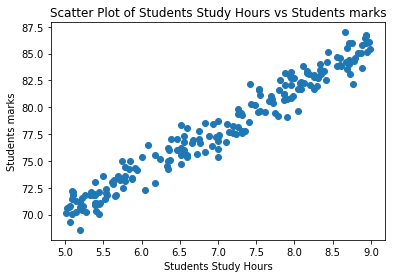

In [71]:
plt.scatter(x =data.study_hours, y = data.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")
plt.show()

### we can see that there is a linear relationship between the student_hours and students_marks. In other words it can be said that as the time is increase in study ultimately the marks also increase.

### Based on this visulazing we can get idea that if a student studied more than 9h then he can get 90% marks

## Prepare the data for Machine Learning algorithms

In [72]:
# spliting the dataset 
X = data.drop("student_marks", axis = "columns")
y = data.drop("study_hours", axis = "columns")
print("shape of X = ", X.shape)
print("shape of y = ", y.shape)

shape of X =  (200, 1)
shape of y =  (200, 1)


In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=51)
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (160, 1)
shape of y_train =  (160, 1)
shape of X_test =  (40, 1)
shape of y_test =  (40, 1)


## Feature scaling

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## Select a model and train it

## For this project i will use linear regression model

In [75]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [76]:
lr.fit(X_train,y_train)

LinearRegression()

###### since our model has been trained, lets test the model by predicting the values

In [77]:
lr.predict([[4]])[0][0].round(2)

/home/sunny/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


66.19

In [78]:
y_pred  = lr.predict(X_test)
y_pred

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

In [79]:
data2 = pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])

In [80]:
data2

,study_hours,student_marks_original,student_marks_predicted
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


In [81]:
lr.score(X_test,y_test)

0.9514124242154464

#### our model has given 95% accuracy which is grt

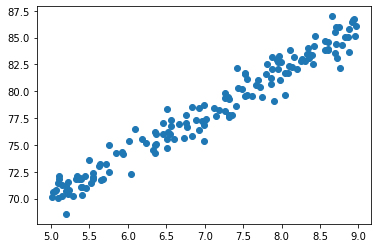

In [82]:
plt.scatter(X_train,y_train)

### lets save our ML model

In [83]:
import joblib
joblib.dump(lr, "student_mark_predictor.pkl")

['student_mark_predictor.pkl']

In [84]:
model = joblib.load("student_mark_predictor.pkl")

In [85]:
model.predict([[5]])[0][0]

/home/sunny/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


70.12594512018406

In [88]:
model.predict([[11]])[0][0]

/home/sunny/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


93.740253220074

## conclusion

## from the above prediction it is clear that if a student spends atleast 11 h in his /her studies then he can score 90% marks